<a href="https://colab.research.google.com/github/yosyos1998/Heart_Disease_Prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Librairies

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Dataset

In [ ]:
data = pd.read_csv('Heart_Disease_Prediction.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Heart_Disease_Prediction.csv'

In [ ]:
data()

NameError: name 'data' is not defined

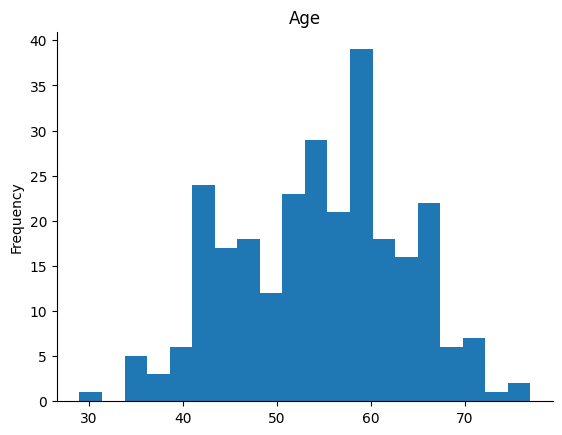

In [ ]:
# @title Age

from matplotlib import pyplot as plt
data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
df2 = data.copy()

In [ ]:
# Check for missing values
print(data.isnull().sum())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [ ]:
# Split the data into features (X) and target variable (y)
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Manually encode the target variable for testing data
y_test_encoded = y_test.replace({'Absence': 0, 'Presence': 1})


# Check unique values
# print("Unique values in y_train_encoded:", y_train_encoded.unique())



In [ ]:
# Hyperparameter Tuning with additional parameters
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'eta': [0.3],
    'alpha': [0],
    'lambda': [1],
    'gamma': [0],
    'colsample_bylevel': [1],
    'colsample_bynode': [1],
    'max_delta_step': [0]
}


In [ ]:
# Create an XGBoost classifier with the best parameters
best_model = XGBClassifier(
    alpha=0,
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=0.8,
    eta=0.3,
    gamma=0,
    lambda=1,
    learning_rate=0.05,
    max_delta_step=0,
    max_depth=4,
    min_child_weight=1,
    subsample=0.8
)

# Train the model with the best parameters
best_model.fit(X_train, y_train_encoded)

# Evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train_encoded)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


NameError: name 'model' is not defined

In [ ]:
# Create an XGBoost classifier with the best parameters
best_model = XGBClassifier(
    alpha=0,
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=0.8,
    eta=0.3,
    gamma=0,
    reg_lambda=1,
    learning_rate=0.05,
    max_delta_step=0,
    max_depth=4,
    min_child_weight=1,
    subsample=0.8
)




In [ ]:
# Train the model with the best parameters
best_model.fit(X_train, y_train_encoded)

# Evaluate the model with encoded target variable for testing data
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities for each class
y_probs = best_model.predict_proba(X_test)
# For binary classification, you need the probabilities of the positive class
y_probs = y_probs[:, 1]

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_probs)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
df2 = data.copy()
df2


In [ ]:
data

In [ ]:
df2=df2.iloc[:, :-1]
df2

In [ ]:

predictset = pd.read_csv('predict.csv')
new_predictions = best_model.predict(predictset)




In [ ]:
df2.to_csv('predict.csv', index = True)